# Análisis de datos sobre el desgaste y el desempeño de una muestra de empleados.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt # para sacar graficos
import pandas as pd
import numpy as np # Calculos matematicos
import seaborn as sns #graficos
import statistics # estadisticas
import scipy.stats as stats # estadisticas

In [2]:
# creando data frame 

df = pd.read_csv("/Users/andresrsalamanca/Documents/GitHub/estadistica_edem/employee_attrition/HR_employee-attrition.csv")

#### *Objetivo General: 
Entender cuales son los principales factores que influyen en la tasa de deserción del talento humano dentro de las empresas.

#### Objetivo especifico:
Conocer cómo afecta la retención de personas dentro de las empresas en variables como edad,  vida y trabajo, nivel de educación y género. 

#### Materiales y metodologia:

Para el estudio se tuvo en cuenta la muestra tomada por el area de HR en un total 1.470 personas de diferentes departamentos y genero. 

El dataset se descarga de Kaggle: https://www.kaggle.com/datasets/patelprashant/employee-attrition?resource=download 

#### Limpieza de datos:
El dataset no traia datos faltantes o caracteres especiales que requirieran correcciones.

In [3]:
# Limpieza de datos 
missing_values = df.isnull().sum()

data_types = df.dtypes

missing_values, data_types

(Age                         0
 Attrition                   0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EmployeeNumber              0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance             0
 YearsAtCompany              0
 YearsIn

#### Analisis y resultados

El éxito de cualquier organización radica fundamentalmente en su capacidad para atraer y retener talento humano. En este contexto, el objetivo de este estudio es identificar los factores que contribuyen a la retención del talento humano en una empresa y explorar los posibles elementos que podrían causar desgaste en los empleados, llevándolos a buscar oportunidades fuera de la organización.

El dataset para este análisis consta de 35 columnas y 1,470 registros. Sin embargo, para los fines de este estudio, nos centraremos principalmente en dos variables:

- Edad (Age): Variable cuantitativa.
- Atrittion (tasa de desercion)

In [26]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

En la muestra encontramos algunos datos cuantitativos relevantes:

1. Edad prom media: 36.9
2. Años prom en la compañia: 7
3. Años prom. en el mismo rol: 4.2
4. Años prom. desde la ultima promocion: 2.1


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


En la muestra se presentan las siguientes profesiones :

1. Life Sciences
2. Medical	
3. Marketing
4. Technical Degree
5. Other
6. Human Resources


Life Sciences y Medical ocupan el 72.8% de la muestra.

Ahora entendamos su distribucion:

In [6]:
pd.crosstab(index=df['EducationField'], columns='count').sort_values(by='count', ascending=False)

col_0,count
EducationField,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


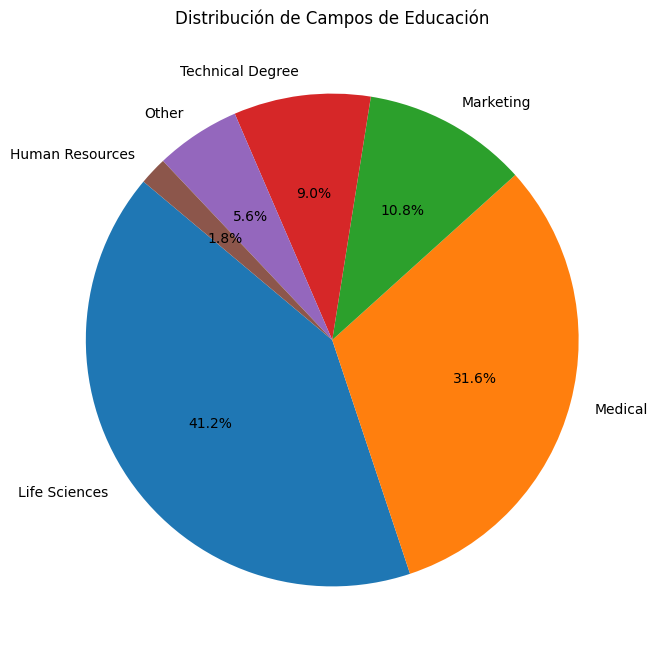

In [7]:
cross_tab = pd.crosstab(index=df['EducationField'], columns='count').sort_values(by='count', ascending=False)
# Graficar el gráfico circular
plt.figure(figsize=(8, 8))  # Puedes ajustar el tamaño según tus necesidades
plt.pie(cross_tab['count'], labels=cross_tab.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Campos de Educación')
plt.show()

Respecto al genero en la muestra de estudio se detalla la siguiente distribucion:

Es importante resaltar que de la totalidad de encuestados el 10% de los hombres y el 5.9% de las mujeres presentan un desgaste en la posición actual que ocupan en la compañía.

In [13]:

attrition_gender_grouped = df.groupby(['Attrition', 'Gender']).size().reset_index(name='Count')
total_count = attrition_gender_grouped['Count'].sum()
attrition_gender_grouped['Percentage'] = (attrition_gender_grouped['Count'] / total_count) * 100

attrition_gender_grouped 



,Attrition,Gender,Count,Percentage
0,No,Female,501,34.081633
1,No,Male,732,49.795918
2,Yes,Female,87,5.918367
3,Yes,Male,150,10.204082


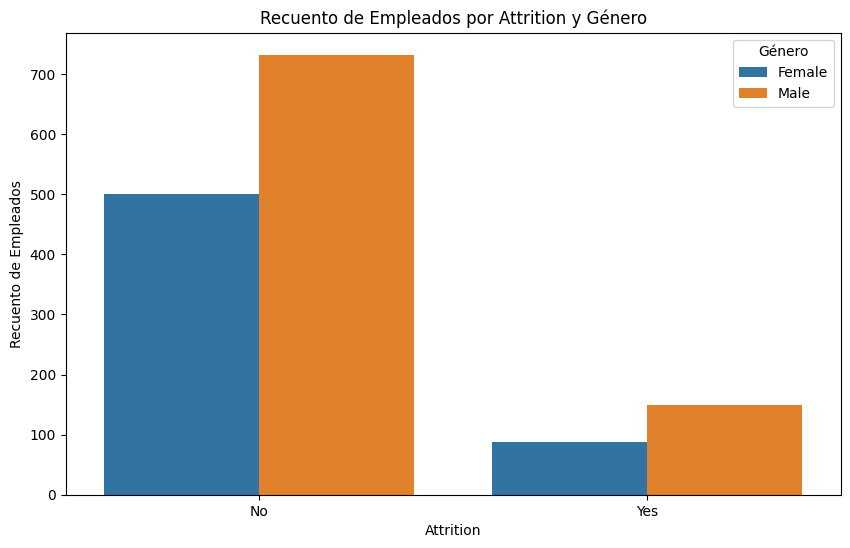

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='Count', hue='Gender', data=attrition_gender_grouped)

plt.title('Recuento de Empleados por Attrition y Género')
plt.xlabel('Attrition')
plt.ylabel('Recuento de Empleados')
plt.legend(title='Género')
plt.show()

El porcentaje de empleados que respondieron "SI" en la encuesta sobre estar "desgastados"('Attrition') en sus posición actual, divididos por campo de educación ('EducationField') es el siguiente:

- Human Resources: 25.93%
- Life Sciences: 14.69%
- Marketing: 22.01%
- Medical: 13.58%
- Other: 13.41%
- Technical Degree: 24.24%

Como se puede ver en la grafica; los campos de 'Human Resources' y 'Technical Degree' tienen los porcentajes más altos de "desgaste", mientras que 'Medical' y 'Other' tienen los más bajos.

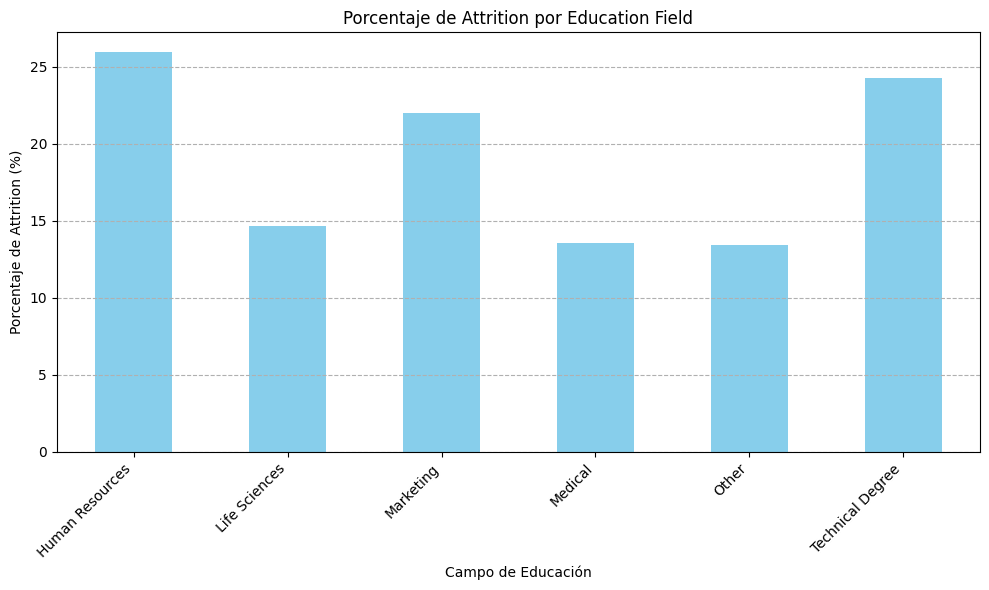

In [17]:
plt.figure(figsize=(10, 6))
attrition_rate.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Attrition por Education Field')
plt.xlabel('Campo de Educación')
plt.ylabel('Porcentaje de Attrition (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

La edad promedio y la desviación estándar de los empleados que respondieron "SI" y "NO" a que sufren algun "desgaste" ('Attrition') son los siguientes:

- Para los empleados que respondieron: ('No'):
Edad promedio: 37.56 años
Desviación estándar: 8.89 años
- Para los empleados que respondieron: ('Yes'):
Edad promedio: 33.61 años
Desviación estándar: 9.69 años.

Esto sugiere que, en promedio, los empleados que tiene un mayor desgaste en la empresa tienden a ser más jóvenes que aquellos que no. Este análisis podría ser útil para desarrollar estrategias de retención enfocadas en grupos de edad más susceptibles a la deserción.

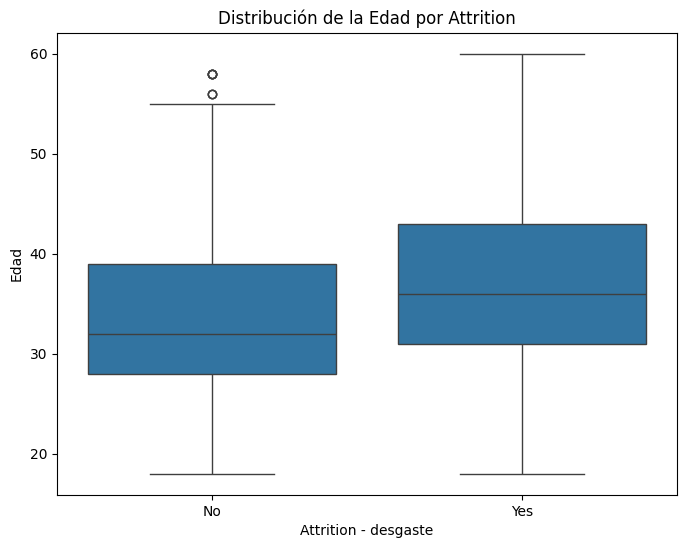

In [25]:
# Gráfico de cajas para comparar la distribución de la edad por 'Attrition'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Distribución de la Edad por Attrition')
plt.xlabel('Attrition - desgaste')
plt.ylabel('Edad')
plt.xticks([0, 1], ['No', 'Yes'])  # Asegurarse de que las etiquetas son correctas

# Mostrar la gráfica
plt.show()

# Hipotesis

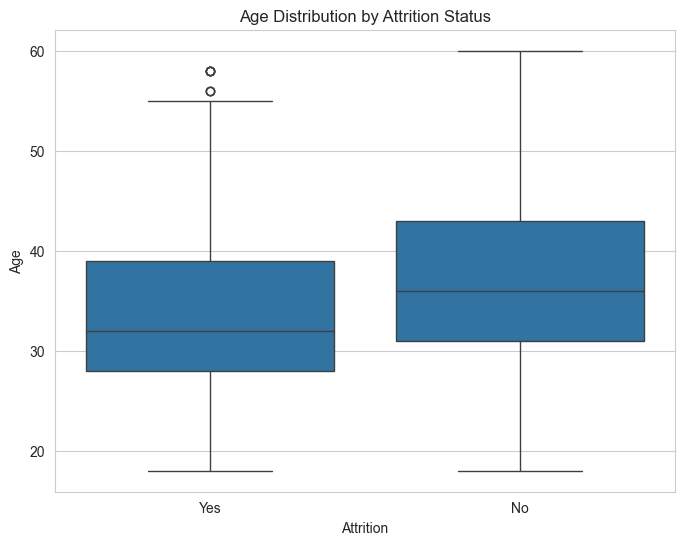

In [23]:

# Plotting the box plot for Age distribution by Attrition status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Age', data=df)

plt.title('Age Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Age')

plt.show()

El ANOVA nos ayudará a determinar si hay diferencias estadísticamente significativas en la media de edades entre los dos grupos de Attrition. Si el valor p obtenido del ANOVA es menor que el nivel de significancia (0.05), podemos concluir que las diferencias en las medias de edad entre los grupos son significativas.

Calculo del ANOVA para estos dos grupos.

El análisis ANOVA realizado para examinar las diferencias en la edad (Age) entre los grupos definidos por Attrition ha resultado en:

Estadístico F: 38.18
Valor p: 0.0000836


H0 = La media de edad de los empleados que  dejan la compañía (Attrition = Yes) es IGUAL a la media de edad de los empleados que no lo desean.

Ha= Existe al menos una diferencia significativa entre las medias de edad de la muestra entre los empleados que quieren 

Una vez realizado la ANOVA arroja que hay evidencia muy fuerte para afirmar que existen diferencias significativas en la edad media entre los empleados que dejan la empresa y los que no, y que estas diferencias no se deben al azar.

In [24]:
# ANOVA test with 'Age' between the 'Attrition' groups
anova_result_age = stats.f_oneway(
    df[df['Attrition'] == 'Yes']['Age'],
    df[df['Attrition'] == 'No']['Age']
)

anova_result_age

F_onewayResult(statistic=38.175886789733404, pvalue=8.356308021102401e-10)